#### Assignment 5: Geographic Data Analysis

In this assignment, you will be using a database of geographic data provided for you in the PySal library to create two plots, a choropleth map and a proportional symbol map. In addition to these two plots, you will compute the value of Moran's I for this data.

#### Dataset

The dataset to be used in this assignment is a dataset containing Per Capita incomes for the United States' lower 48 states. In addition to the state-by-state data, the dataset contains shape files for each state that you can use
to create the choropleth and proportional symbol maps.

#### Administrative Notes

This assignment will be graded by Coursera's grading system. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment with the output of the code in the cell's display area. The display area should contain only your answer to the question with no extraneous information, or else the answer may not be picked up correctly. Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed.

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
# OLD PYSAL -> New PYSAL
# ps.open -> ps.lib.io.open
# ps.examples -> ps.lib.examples
from pysal.explore import esda
from pysal.lib import examples, io
from sklearn import preprocessing


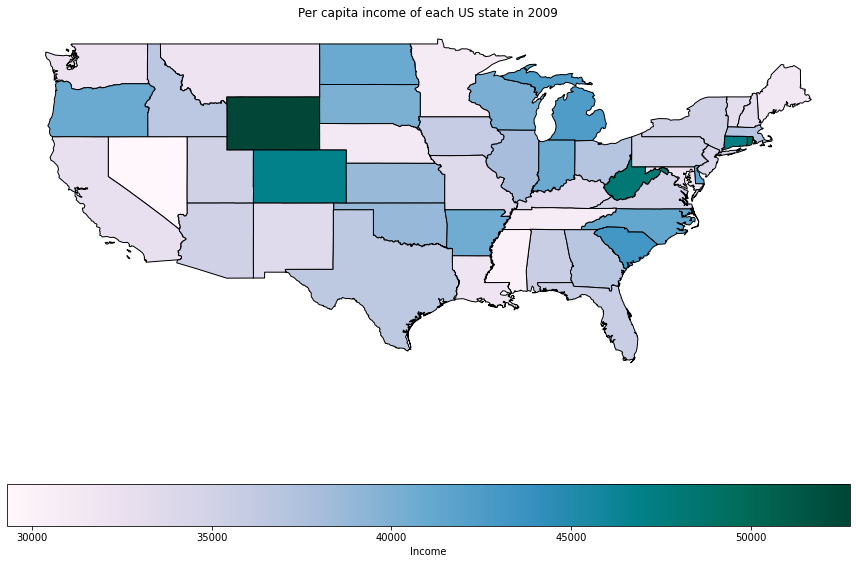

In [235]:
# Graded Cell, PartID: CkcsR
# Part 1: Using the PySal Data, create a choropleth path of the United States
# that depicts the per capita income of each US state in 2009.
# Notes: The PySal and GeoPandas libraries both contain utility functions that
# may make this task easier.
per_cap_data = io.open(examples.get_path("usjoin.csv"))

us_df = gpd.read_file(examples.get_path("us48.shp"))

us_df['per_cap'] = np.array(per_cap_data.by_col("2009"))
us_df.plot(column = "per_cap",  figsize=(12,10), legend=True, edgecolor='black',
           legend_kwds={
            'label': "Income",
            'orientation': "horizontal"
           },
          cmap='PuBuGn')

plt.axis('off')
plt.title("Per capita income of each US state in 2009")
plt.tight_layout()
plt.show()

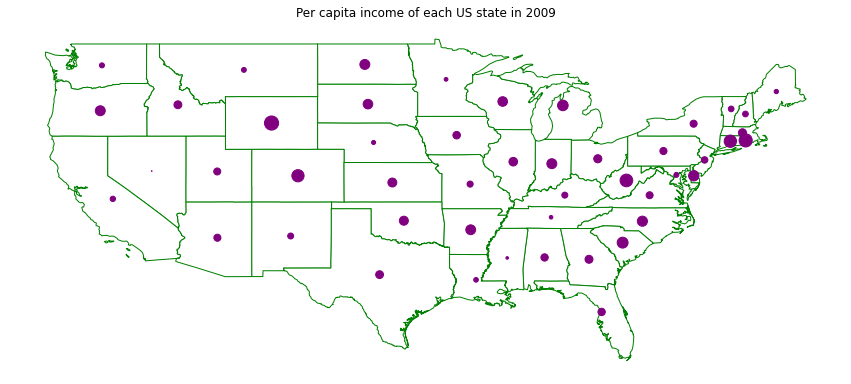

In [210]:
# Graded Cell, PartID: FqNRm
# Part 2: Again using the PySal Data, create a proportional symbol map showing 
# a dot at the centroid of each state that is scaled to the per capita income 
# of each US state in 2009.
# Notes: The demonstration notebook for this unit contains code that performs 
# a similar task and may be a useful reference for your assignment.

plt.close('all')

us_df['centroid_column'] = us_df.centroid
centroids = list(us_df['centroid_column'])
df = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))], \
                   'x':[centroids[i].x for i in range(len(centroids))], \
                   'data':list(us_df['per_cap'])})
base = us_df.plot(color='white', edgecolor='green', figsize=(15,15))
min_max_scaler = preprocessing.MinMaxScaler()
x = df[['data']].values.astype(int)
x_scaled = (min_max_scaler.fit_transform(x)).flatten()
x_scaled = x_scaled * 200
x_scaled = [x if x != 0 else 0.5 for x in x_scaled] 
df.plot(kind='scatter', x='x', y='y', s=x_scaled, ax=base, c='purple')
plt.axis('off')
plt.title("Per capita income of each US state in 2009")
plt.show()


In [204]:
# Graded Cell, PartID: CtQYv
# Part 3: Using the same data, compute the value of Moran's I for the per 
# capita income of each US state in 2009 using Rook Continuity. Report the 
# value of I rounded to 4 decimal places (i.e. x.XXXX)
# Notes: Again, the PySal and GeoPandas libraries may contain useful utility
# functions.

y = us_df['per_cap']
df = gpd.read_file(examples.get_path('us48.shx'))
w = weights.Rook.from_dataframe(df)
mi = esda.Moran(y, w, two_tailed=False)
print (round(mi.I, 4))

0.0407
